1. Load dataset from - https://covid.ourworldindata.org/data/owid-covid-data.csv 

2. Subset only those rows that have “India” in the “location” column(This subsetted dataframe has to be used for modelling) 

3. Univariate Analysis: 
       a. Draw histograms of each numerical variable 
       b. Find mean, median and mode of each column 

4. Bivariate Analysis: 
       a. Draw scatter plots of each numerical column versus one another 
       b. Draw line plots of each numerical column versus one another 

5. Handle Missing values:   
       a. If there are null values in numerical column, replace the null values by the mean of that column  
       b. If there are null values in categorical column, replace the null values by the mode of that column 
       c. If more than 50%the values in a column are null, then drop that entire column 

6. Convert date column to ordinal 
       a. Code: import datetime as dt 
                df["date"]=pd.to_datetime(df["date"]) 
                df["date"]=df["date"].map(dt.datetime.toordinal)

7. Drop all categorical columns 

8. Select “total_cases” column as the target variable 

9. Select the other columns as the features(the “date” column has to be in the features) 

10. Perform train-test split 

11. Modelling: 
        a. Linear Regression 
        b. Random Forest Regressor 

12. Get accuracy 

13. Predict Total case for a new date 

NOTE: To convert anytime back from ordinal to date-time use the following sample code: from datetime import datetime ordinal value = 733828 # This is an example

In [1]:
#Importing required packages.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Loading dataset
df_covid = pd.read_csv('Music/owid-covid-data.csv')

In [3]:
#Let's check how the data is distributed
df_covid.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
0,AFG,Asia,Afghanistan,2019-12-31,0.0,0.0,NaN,0.0,0.0,NaN,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
1,AFG,Asia,Afghanistan,2020-01-01,0.0,0.0,NaN,0.0,0.0,NaN,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
2,AFG,Asia,Afghanistan,2020-01-02,0.0,0.0,NaN,0.0,0.0,NaN,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
3,AFG,Asia,Afghanistan,2020-01-03,0.0,0.0,NaN,0.0,0.0,NaN,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
4,AFG,Asia,Afghanistan,2020-01-04,0.0,0.0,NaN,0.0,0.0,NaN,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83


From the first 5 lines of the dataset I already got some null values. So I have to remove the null values in the dataset. Before that I have to separate the dataset where the location is India.

In [4]:
df_covid.tail()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
42431,NaN,NaN,International,2020-09-04,696.0,NaN,NaN,7.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42432,NaN,NaN,International,2020-09-05,696.0,NaN,NaN,7.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42433,NaN,NaN,International,2020-09-06,696.0,NaN,NaN,7.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42434,NaN,NaN,International,2020-09-07,696.0,NaN,NaN,7.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42435,NaN,NaN,International,2020-09-08,696.0,NaN,NaN,7.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df_covid.shape

(42436, 40)

In [6]:
df_covid.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'tests_per_case', 'positive_rate', 'tests_units', 'stringency_index',
       'population', 'population_density', 'median_age', 'aged_65_older',
       'aged_70_older', 'gdp_per_capita', 'extreme_poverty',
       'cardiovasc_death_rate', 'diabetes_prevalence', 'female_smokers',
       'male_smokers', 'handwashing_facilities', 'hospital_beds_per_thousand',
       'life_expectancy'],
      dtype='object')

In [7]:
#Information about the data columns
df_covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42436 entries, 0 to 42435
Data columns (total 40 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   iso_code                         42183 non-null  object 
 1   continent                        41930 non-null  object 
 2   location                         42436 non-null  object 
 3   date                             42436 non-null  object 
 4   total_cases                      41861 non-null  float64
 5   new_cases                        41672 non-null  float64
 6   new_cases_smoothed               40890 non-null  float64
 7   total_deaths                     41861 non-null  float64
 8   new_deaths                       41672 non-null  float64
 9   new_deaths_smoothed              40890 non-null  float64
 10  total_cases_per_million          41608 non-null  float64
 11  new_cases_per_million            41608 non-null  float64
 12  new_cases_smoothed

The dataset have many null values. Categorial columns are also present. 

In [ ]:
#df_covid.isnull().sum()

In [8]:
# Information on the Dataset
df_covid.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
count,4.186100e+04,41672.000000,40890.000000,41861.000000,41672.000000,40890.000000,41608.000000,41608.000000,40825.000000,41608.000000,...,37682.000000,37401.000000,24975.000000,37891.000000,39215.000000,29798.000000,29425.000000,17641.000000,34294.000000,41658.000000
mean,8.364146e+04,1313.430985,1301.567855,3614.179284,42.862546,42.817819,1617.012016,22.244389,21.959653,52.048687,...,5.892329,21075.564374,11.920340,251.045549,8.046316,10.858212,32.639424,52.716465,3.120920,74.086577
std,8.664572e+05,12014.206551,11826.075435,33810.955798,364.860626,353.845523,3543.056338,70.092922,53.504173,136.676021,...,4.327437,20514.370925,19.069537,117.734515,4.137916,10.485882,13.399365,31.550931,2.535461,7.357551
min,0.000000e+00,-8261.000000,-552.000000,0.000000,-1918.000000,-232.143000,0.000000,-2212.545000,-269.978000,0.000000,...,0.526000,661.240000,0.100000,79.370000,0.990000,0.100000,7.700000,1.188000,0.100000,53.280000
25%,4.200000e+01,0.000000,0.429000,0.000000,0.000000,0.000000,20.079000,0.000000,0.105000,0.000000,...,2.142000,5591.597000,0.500000,153.507000,5.310000,1.900000,21.400000,21.222000,1.300000,69.910000
50%,8.340000e+02,8.500000,13.000000,15.000000,0.000000,0.143000,248.771500,1.315000,2.622000,4.088500,...,4.419000,14103.452000,1.800000,237.372000,7.110000,6.434000,31.400000,55.182000,2.500000,75.490000
75%,8.815000e+03,145.000000,149.714000,188.000000,3.000000,2.857000,1589.719250,15.077000,16.715000,30.635000,...,9.719000,32415.132000,16.000000,318.949000,10.180000,19.600000,40.900000,83.741000,4.200000,79.930000
max,2.736665e+07,298107.000000,270578.286000,893084.000000,10491.000000,7456.571000,41772.126000,4944.376000,882.924000,1237.551000,...,18.493000,116935.600000,77.600000,724.417000,23.360000,44.000000,78.100000,98.999000,13.800000,86.750000


In [9]:
#Checking Null values on the dataset
df_covid.isnull().sum()

iso_code                             253
continent                            506
location                               0
date                                   0
total_cases                          575
new_cases                            764
new_cases_smoothed                  1546
total_deaths                         575
new_deaths                           764
new_deaths_smoothed                 1546
total_cases_per_million              828
new_cases_per_million                828
new_cases_smoothed_per_million      1611
total_deaths_per_million             828
new_deaths_per_million               828
new_deaths_smoothed_per_million     1611
new_tests                          28305
total_tests                        27951
total_tests_per_thousand           27951
new_tests_per_thousand             28305
new_tests_smoothed                 26555
new_tests_smoothed_per_thousand    26555
tests_per_case                     27728
positive_rate                      27348
tests_units     

The null values in the whole dataset are listed above.

Now we have to separete the data where the location is India. We will do the analysis in future on the indian dataset.

In [10]:
# Subsetting those rows where location is India
df=df_covid[df_covid["location"]=="India"]

In [11]:
# Let's check the new dataset
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
17719,IND,Asia,India,2019-12-31,0.0,0.0,NaN,0.0,0.0,NaN,...,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66
17720,IND,Asia,India,2020-01-01,0.0,0.0,NaN,0.0,0.0,NaN,...,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66
17721,IND,Asia,India,2020-01-02,0.0,0.0,NaN,0.0,0.0,NaN,...,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66
17722,IND,Asia,India,2020-01-03,0.0,0.0,NaN,0.0,0.0,NaN,...,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66
17723,IND,Asia,India,2020-01-04,0.0,0.0,NaN,0.0,0.0,NaN,...,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66


In [12]:
df.tail()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
17967,IND,Asia,India,2020-09-04,3936747.0,83341.0,78463.857,68472.0,1096.0,991.857,...,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66
17968,IND,Asia,India,2020-09-05,4023179.0,86432.0,79886.714,69561.0,1089.0,1001.571,...,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66
17969,IND,Asia,India,2020-09-06,4113811.0,90632.0,81582.571,70626.0,1065.0,1018.286,...,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66
17970,IND,Asia,India,2020-09-07,4204613.0,90802.0,83338.286,71642.0,1016.0,1024.714,...,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66
17971,IND,Asia,India,2020-09-08,4280422.0,75809.0,84179.429,72775.0,1133.0,1078.143,...,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66


In [13]:
df.shape

(253, 40)

In [14]:
# Information about the new Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 253 entries, 17719 to 17971
Data columns (total 40 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   iso_code                         253 non-null    object 
 1   continent                        253 non-null    object 
 2   location                         253 non-null    object 
 3   date                             253 non-null    object 
 4   total_cases                      252 non-null    float64
 5   new_cases                        252 non-null    float64
 6   new_cases_smoothed               247 non-null    float64
 7   total_deaths                     252 non-null    float64
 8   new_deaths                       252 non-null    float64
 9   new_deaths_smoothed              247 non-null    float64
 10  total_cases_per_million          252 non-null    float64
 11  new_cases_per_million            252 non-null    float64
 12  new_cases_smooth

Here Null values are present on the dataset. Here the categorical columns also have null values so we have to replace them by the mode of that column. And for the numerical columns the Null values must be replaced by the mean.

In [15]:
# More information on the new dataset
df.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
count,2.520000e+02,252.000000,247.000000,252.000000,252.000000,247.000000,252.000000,252.000000,247.000000,252.000000,...,2.530000e+02,2.530000e+02,2.530000e+02,2.530000e+02,2.530000e+02,2.530000e+02,2.530000e+02,2.530000e+02,2.530000e+02,2.530000e+02
mean,6.280524e+05,16985.801587,16299.422239,13181.420635,288.789683,281.541364,455.108960,12.308504,11.811126,9.551718,...,3.414000e+00,6.426674e+03,2.120000e+01,2.822800e+02,1.039000e+01,1.900000e+00,2.060000e+01,5.955000e+01,5.300000e-01,6.966000e+01
std,1.071678e+06,25063.367772,24022.379330,19937.914767,372.085957,348.136870,776.576065,18.161784,17.407475,14.447694,...,1.023430e-14,4.100839e-11,9.967316e-14,7.973853e-13,7.119511e-15,8.454420e-15,2.847805e-14,2.563024e-13,8.899389e-16,1.139122e-13
min,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,3.414000e+00,6.426674e+03,2.120000e+01,2.822800e+02,1.039000e+01,1.900000e+00,2.060000e+01,5.955000e+01,5.300000e-01,6.966000e+01
25%,4.500000e+00,1.000000,4.214500,0.000000,0.000000,0.000000,0.003500,0.001000,0.003000,0.000000,...,3.414000e+00,6.426674e+03,2.120000e+01,2.822800e+02,1.039000e+01,1.900000e+00,2.060000e+01,5.955000e+01,5.300000e-01,6.966000e+01
50%,4.791200e+04,3117.500000,3042.714000,1631.000000,88.000000,103.000000,34.718500,2.259000,2.205000,1.182000,...,3.414000e+00,6.426674e+03,2.120000e+01,2.822800e+02,1.039000e+01,1.900000e+00,2.060000e+01,5.955000e+01,5.300000e-01,6.966000e+01
75%,7.253530e+05,24398.500000,22827.071500,20280.500000,490.250000,532.357000,525.616750,17.680000,16.541500,14.696250,...,3.414000e+00,6.426674e+03,2.120000e+01,2.822800e+02,1.039000e+01,1.900000e+00,2.060000e+01,5.955000e+01,5.300000e-01,6.966000e+01
max,4.280422e+06,90802.000000,84179.429000,72775.000000,2003.000000,1078.143000,3101.745000,65.798000,60.999000,52.735000,...,3.414000e+00,6.426674e+03,2.120000e+01,2.822800e+02,1.039000e+01,1.900000e+00,2.060000e+01,5.955000e+01,5.300000e-01,6.966000e+01


In [16]:
#Checking Null values on the new dataset
df.isnull().sum()

iso_code                            0
continent                           0
location                            0
date                                0
total_cases                         1
new_cases                           1
new_cases_smoothed                  6
total_deaths                        1
new_deaths                          1
new_deaths_smoothed                 6
total_cases_per_million             1
new_cases_per_million               1
new_cases_smoothed_per_million      6
total_deaths_per_million            1
new_deaths_per_million              1
new_deaths_smoothed_per_million     6
new_tests                          93
total_tests                        87
total_tests_per_thousand           87
new_tests_per_thousand             93
new_tests_smoothed                 82
new_tests_smoothed_per_thousand    82
tests_per_case                     82
positive_rate                      82
tests_units                        75
stringency_index                    3
population  

The Null values on the new dataset are listed above.

In [17]:
# To check for number of columns
df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'tests_per_case', 'positive_rate', 'tests_units', 'stringency_index',
       'population', 'population_density', 'median_age', 'aged_65_older',
       'aged_70_older', 'gdp_per_capita', 'extreme_poverty',
       'cardiovasc_death_rate', 'diabetes_prevalence', 'female_smokers',
       'male_smokers', 'handwashing_facilities', 'hospital_beds_per_thousand',
       'life_expectancy'],
      dtype='object')

In [25]:
# Defining a variable cols 
cols=['total_cases', 'new_cases',
       'total_deaths', 'new_deaths', 'total_cases_per_million',
       'new_cases_per_million', 'total_deaths_per_million',
       'new_deaths_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'stringency_index', 'population', 'population_density', 'median_age',
       'aged_65_older', 'aged_70_older', 'gdp_per_capita', 'extreme_poverty',
       'diabetes_prevalence', 'female_smokers',
       'male_smokers', 'handwashing_facilities', 'hospital_beds_per_thousand',
       'life_expectancy']

Now we are going to plot the histogram for all numerical column. The numerical columns are listed above in a variable named cols. Here we will do univariate analysis that mean we will draw histograms on each columns.

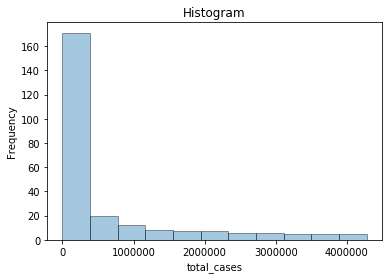

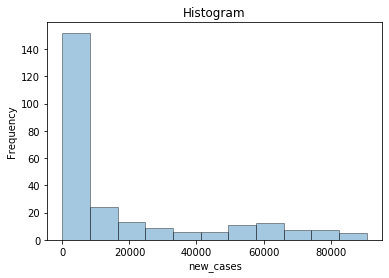

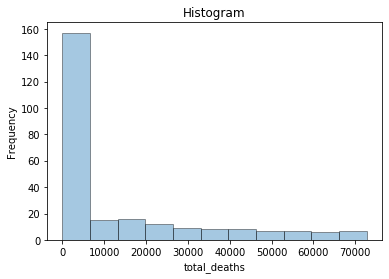

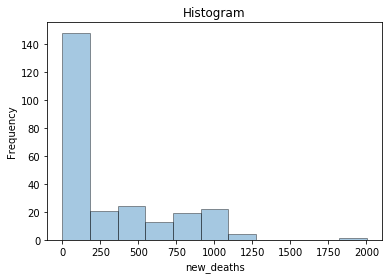

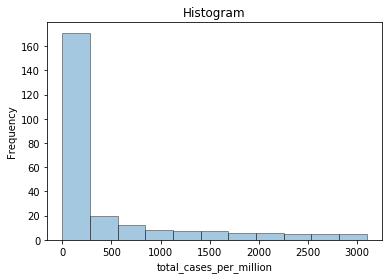

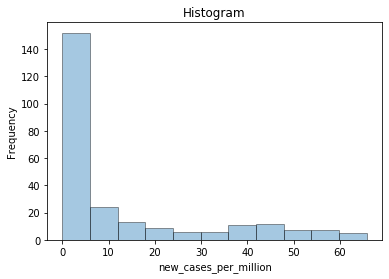

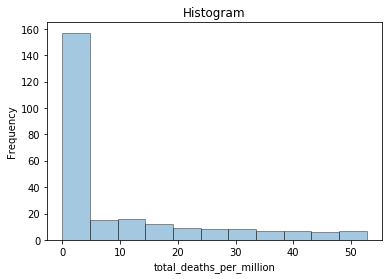

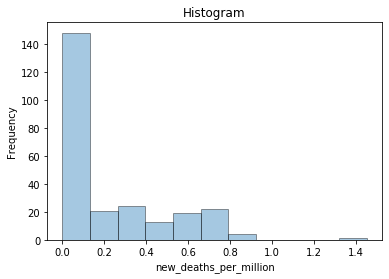

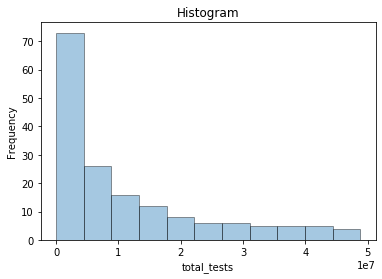

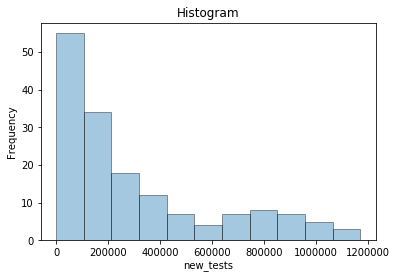

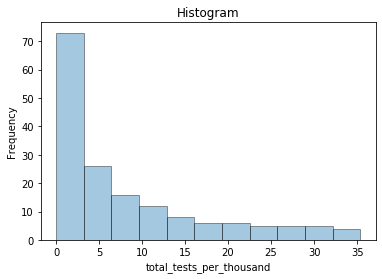

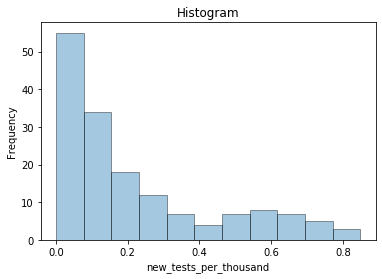

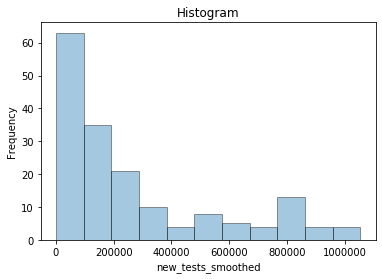

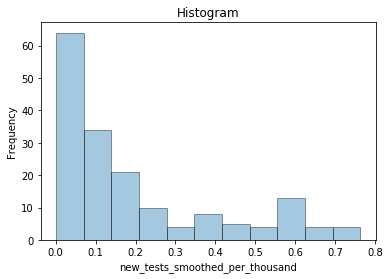

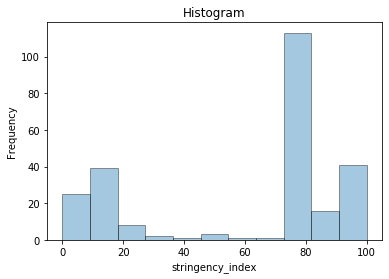

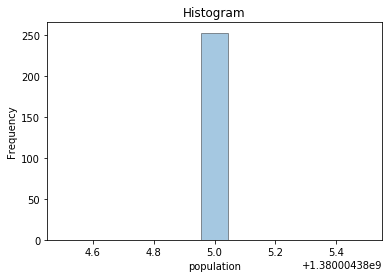

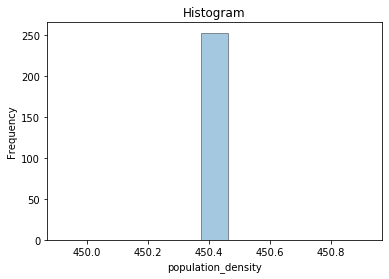

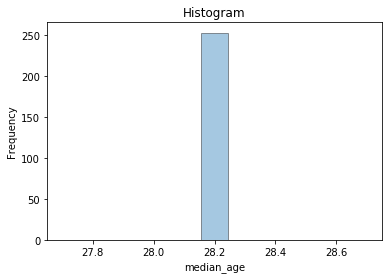

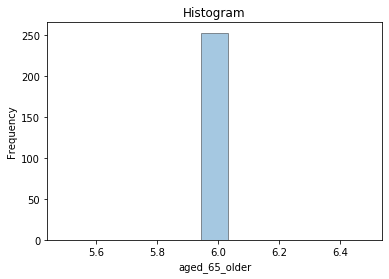

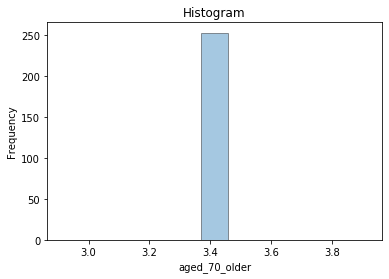

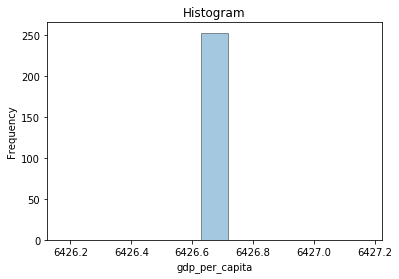

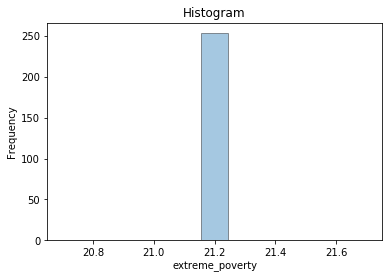

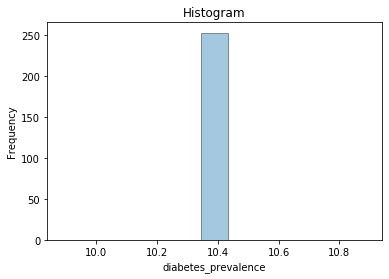

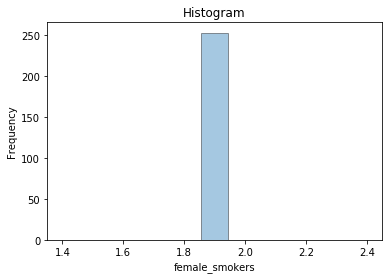

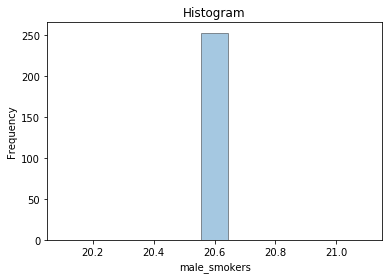

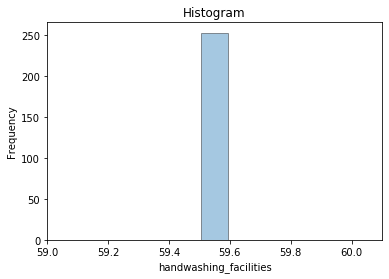

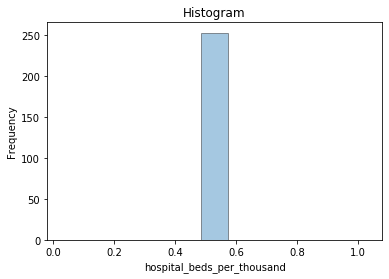

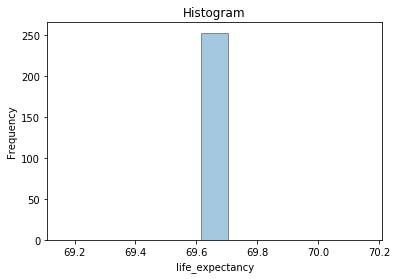

In [26]:
#Plotting Histograms
for i in cols:
  sns.distplot(df[i],kde=False,hist=True,bins=11,hist_kws=dict(edgecolor="k", linewidth=1))
  plt.title("Histogram")
  plt.ylabel("Frequency")
  plt.show()

From these histograms we observe that the columns new_deaths , new_deaths_per_million consists of outliers . So we have to remove the outliers before making prediction on the model.

In [27]:
#Plotting Boxplots

# for i in cols:
#   sns.boxplot(y=i, data = df)
#   #sns.boxplot(y=i, data = df)
#   plt.title("Boxplot 11")
#   plt.show()

Now calculating the mean median mode of the new dataset.

In [28]:
# Checking the mean of each column in the new dataset
df.mean()

total_cases                        6.280524e+05
new_cases                          1.698580e+04
new_cases_smoothed                 1.629942e+04
total_deaths                       1.318142e+04
new_deaths                         2.887897e+02
new_deaths_smoothed                2.815414e+02
total_cases_per_million            4.551090e+02
new_cases_per_million              1.230850e+01
new_cases_smoothed_per_million     1.181113e+01
total_deaths_per_million           9.551718e+00
new_deaths_per_million             2.092619e-01
new_deaths_smoothed_per_million    2.040162e-01
new_tests                          3.043516e+05
total_tests                        1.122553e+07
total_tests_per_thousand           8.134440e+00
new_tests_per_thousand             2.205687e-01
new_tests_smoothed                 2.662121e+05
new_tests_smoothed_per_thousand    1.929064e-01
tests_per_case                     1.842281e+01
positive_rate                      6.624561e-02
stringency_index                   6.074

In [29]:
# Checking the median of each column in the new dataset
df.median()

total_cases                        4.791200e+04
new_cases                          3.117500e+03
new_cases_smoothed                 3.042714e+03
total_deaths                       1.631000e+03
new_deaths                         8.800000e+01
new_deaths_smoothed                1.030000e+02
total_cases_per_million            3.471850e+01
new_cases_per_million              2.259000e+00
new_cases_smoothed_per_million     2.205000e+00
total_deaths_per_million           1.182000e+00
new_deaths_per_million             6.350000e-02
new_deaths_smoothed_per_million    7.500000e-02
new_tests                          1.642995e+05
total_tests                        5.847601e+06
total_tests_per_thousand           4.237500e+00
new_tests_per_thousand             1.190000e-01
new_tests_smoothed                 1.404090e+05
new_tests_smoothed_per_thousand    1.020000e-01
tests_per_case                     1.388900e+01
positive_rate                      7.200000e-02
stringency_index                   7.778

In [30]:
# Checking the mode of each column in the new dataset
df.mode()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
0,IND,Asia,India,2019-12-31,0.0,0.0,0.0,0.0,0.0,0.0,...,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66
1,NaN,NaN,NaN,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,2020-01-02,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,2020-01-03,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,2020-01-04,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,NaN,NaN,NaN,2020-09-04,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
249,NaN,NaN,NaN,2020-09-05,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
250,NaN,NaN,NaN,2020-09-06,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
251,NaN,NaN,NaN,2020-09-07,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#sns.pairplot(df)

In [ ]:
# Plotting ScatterPlots

# for i in cols:
#   for j in reversed(cols):
#     sns.scatterplot(x=i, y=j, data=df)
#     plt.title("Scatter Plot")
#     plt.show()

Now we are going to plot Scatterplots as well as lineplots for the new dataset.Here we are going to use bivariate analysis. We are going to separate the target column from the other numerical columns. And then do the analysis on the target columns versus numerical columns

In [33]:
# Defining  new variables for cols 
cols=[ 'new_cases',
       'total_deaths', 'new_deaths', 'total_cases_per_million',
       'new_cases_per_million', 'total_deaths_per_million',
       'new_deaths_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'stringency_index', 'population', 'population_density', 'median_age',
       'aged_65_older', 'aged_70_older', 'gdp_per_capita', 'extreme_poverty',
        'diabetes_prevalence', 'female_smokers',
       'male_smokers', 'handwashing_facilities', 'hospital_beds_per_thousand',
       'life_expectancy']

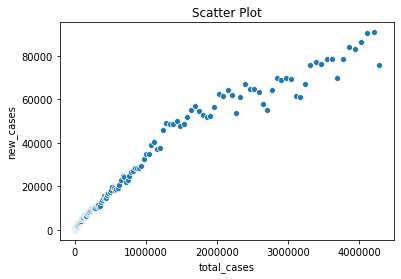

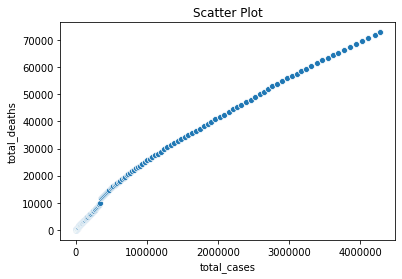

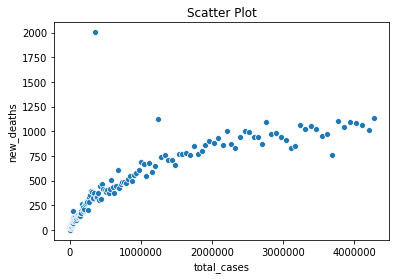

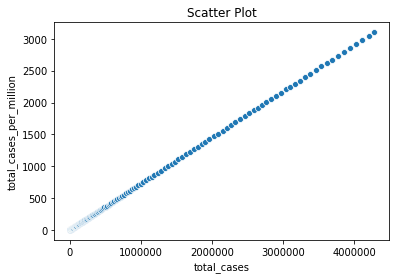

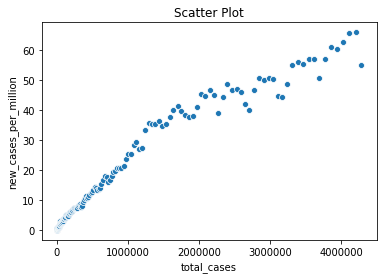

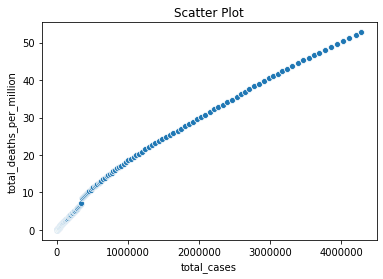

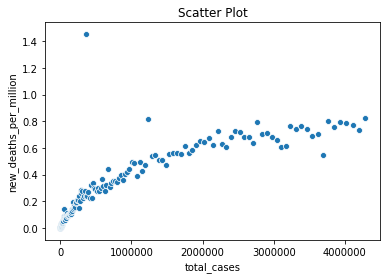

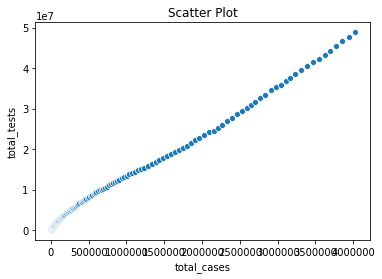

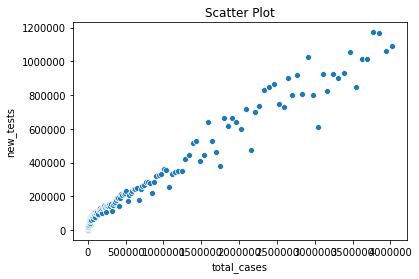

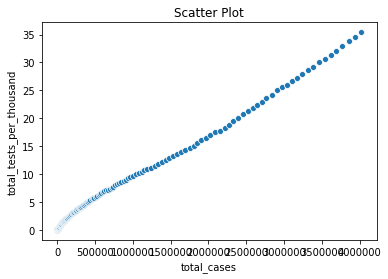

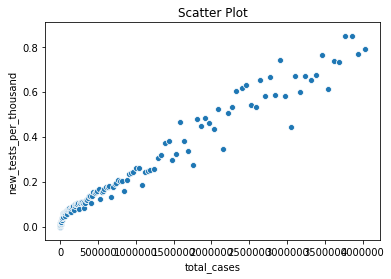

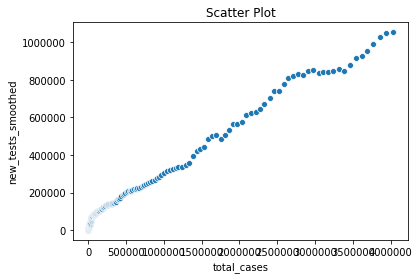

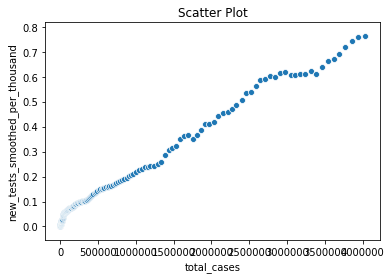

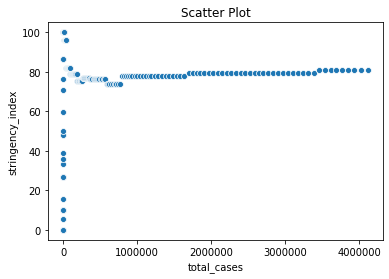

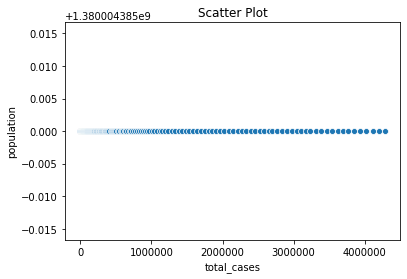

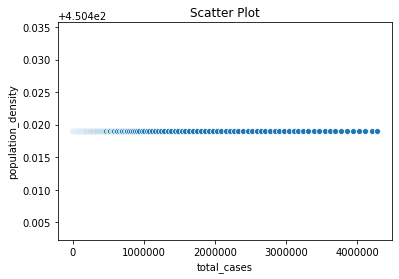

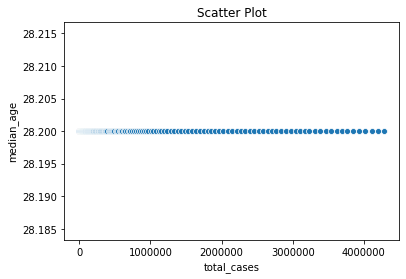

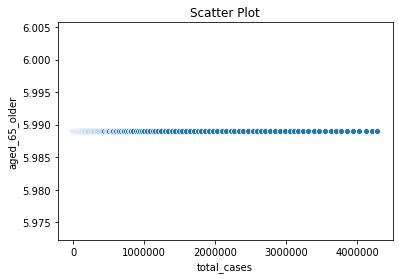

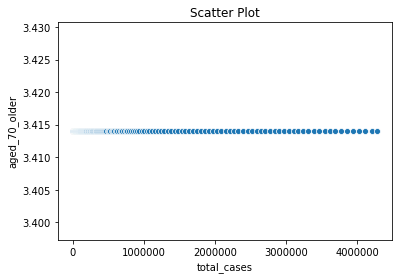

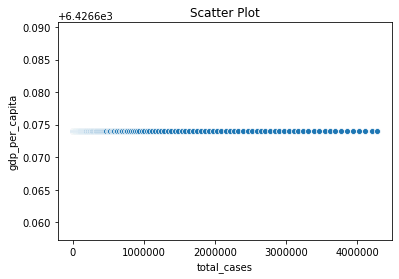

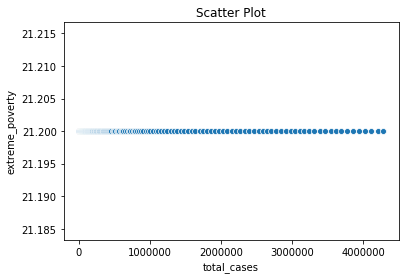

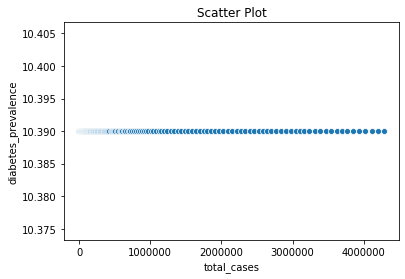

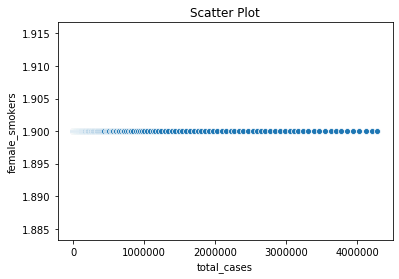

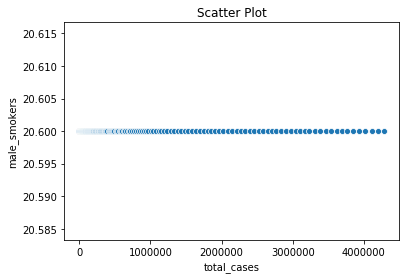

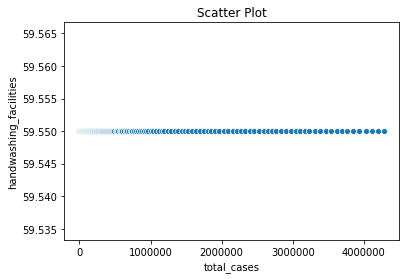

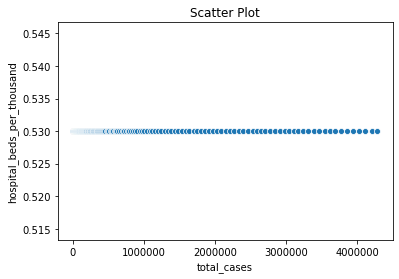

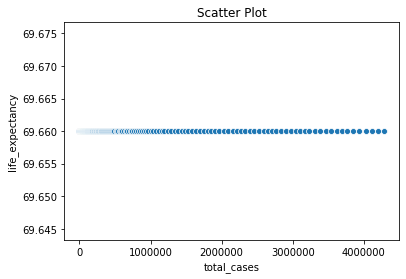

In [34]:
# Plotting ScatterPlots
for i in cols:
    sns.scatterplot(x='total_cases', y=i, data=df)
    plt.title("Scatter Plot")
    plt.show()

In [36]:
#Plotting Lineplots

# for i in cols:
#   for j in reversed(cols):
#     sns.lineplot(x=i,y=j,data=df)
#     plt.title("Line Plots")
#     plt.show()

In [ ]:
# Plotting Lineplots
for i in cols:
    sns.lineplot(x='total_cases',y=i,data=df)
    plt.title("Line Plots")
    plt.show()

So from the previously plotted histograms we observed that outliers are present on the new dataset. And when we observe the dataset carefully we will observe that most of the outliers are mainly present on the 168 row of the dataset . So we will drop that entire row to make better prediction and more accuracy on the model.

In [37]:
# Removing outliers in the dataset
df.drop(df.index[168],inplace=True)

C:\Users\HP-NPC\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [38]:
# Checking the info once again
# df.info

In [39]:
# Observe the changes after removing outliers
df.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
count,2.510000e+02,251.000000,246.000000,251.000000,251.000000,246.000000,251.000000,251.000000,246.000000,251.000000,...,2.520000e+02,2.520000e+02,2.520000e+02,2.520000e+02,2.520000e+02,2.520000e+02,2.520000e+02,2.520000e+02,2.520000e+02,2.520000e+02
mean,6.291877e+05,17010.976096,16321.259033,13194.494024,288.426295,281.272370,455.931641,12.326745,11.826947,9.561191,...,3.414000e+00,6.426674e+03,2.120000e+01,2.822800e+02,1.039000e+01,1.900000e+00,2.060000e+01,5.955000e+01,5.300000e-01,6.966000e+01
std,1.073668e+06,25110.251858,24068.898065,19976.668505,372.784578,348.820908,778.017628,18.195758,17.441185,14.475776,...,1.023438e-14,4.100871e-11,9.967395e-14,7.973916e-13,7.119568e-15,8.454486e-15,2.847827e-14,2.563044e-13,8.899459e-16,1.139131e-13
min,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,3.414000e+00,6.426674e+03,2.120000e+01,2.822800e+02,1.039000e+01,1.900000e+00,2.060000e+01,5.955000e+01,5.300000e-01,6.966000e+01
25%,4.000000e+00,1.000000,4.107250,0.000000,0.000000,0.000000,0.003000,0.001000,0.003000,0.000000,...,3.414000e+00,6.426674e+03,2.120000e+01,2.822800e+02,1.039000e+01,1.900000e+00,2.060000e+01,5.955000e+01,5.300000e-01,6.966000e+01
50%,4.643300e+04,2958.000000,2942.928500,1568.000000,87.000000,102.143000,33.647000,2.143000,2.132500,1.136000,...,3.414000e+00,6.426674e+03,2.120000e+01,2.822800e+02,1.039000e+01,1.900000e+00,2.060000e+01,5.955000e+01,5.300000e-01,6.966000e+01
75%,7.310410e+05,24549.000000,23031.750250,20401.000000,493.500000,536.607000,529.738500,17.789000,16.689750,14.783500,...,3.414000e+00,6.426674e+03,2.120000e+01,2.822800e+02,1.039000e+01,1.900000e+00,2.060000e+01,5.955000e+01,5.300000e-01,6.966000e+01
max,4.280422e+06,90802.000000,84179.429000,72775.000000,2003.000000,1078.143000,3101.745000,65.798000,60.999000,52.735000,...,3.414000e+00,6.426674e+03,2.120000e+01,2.822800e+02,1.039000e+01,1.900000e+00,2.060000e+01,5.955000e+01,5.300000e-01,6.966000e+01


Now after removing the outliers we have to remove the null values also .So we will replace the null values of the numerical columns by the mean and for the categorical by the mode.

In [40]:
# Replacing the null values with the mean of the columns
#df.fillna(df.mean(), inplace=True)
df=df.fillna(df.mean())

In [41]:
# Replacing the null categorical columns with their mode
df['tests_units'].fillna(df['tests_units'].mode()[0],inplace=True)

In [42]:
# Now there are no Null values in the Dataset
#df.info()
df.isnull().sum()

iso_code                           0
continent                          0
location                           0
date                               0
total_cases                        0
new_cases                          0
new_cases_smoothed                 0
total_deaths                       0
new_deaths                         0
new_deaths_smoothed                0
total_cases_per_million            0
new_cases_per_million              0
new_cases_smoothed_per_million     0
total_deaths_per_million           0
new_deaths_per_million             0
new_deaths_smoothed_per_million    0
new_tests                          0
total_tests                        0
total_tests_per_thousand           0
new_tests_per_thousand             0
new_tests_smoothed                 0
new_tests_smoothed_per_thousand    0
tests_per_case                     0
positive_rate                      0
tests_units                        0
stringency_index                   0
population                         0
p

Now we have cleaned the dataset properly. And the next task will be to convert the date column to ordinal.

In [43]:
# Convert date column to ordinal
import datetime as dt 
df["date"]=pd.to_datetime(df["date"]) 
df["date"]=df["date"].map(dt.datetime.toordinal)

In [44]:
# Date column was changed to ordinal
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
17719,IND,Asia,India,737424,0.0,0.0,16321.259033,0.0,0.0,281.27237,...,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66
17720,IND,Asia,India,737425,0.0,0.0,16321.259033,0.0,0.0,281.27237,...,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66
17721,IND,Asia,India,737426,0.0,0.0,16321.259033,0.0,0.0,281.27237,...,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66
17722,IND,Asia,India,737427,0.0,0.0,16321.259033,0.0,0.0,281.27237,...,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66
17723,IND,Asia,India,737428,0.0,0.0,16321.259033,0.0,0.0,281.27237,...,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66


Now we have to drop the categorical columns 'iso_code', 'continent' , 'location' , 'tests_units' .

In [45]:
# Droping the categorical columns to prepare the dataset for training
df.drop(['iso_code', 'continent','location','tests_units'], axis=1, inplace=True)
df.head()

,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,...,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
17719,737424,0.0,0.0,16321.259033,0.0,0.0,281.27237,0.0,0.0,11.826947,...,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66
17720,737425,0.0,0.0,16321.259033,0.0,0.0,281.27237,0.0,0.0,11.826947,...,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66
17721,737426,0.0,0.0,16321.259033,0.0,0.0,281.27237,0.0,0.0,11.826947,...,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66
17722,737427,0.0,0.0,16321.259033,0.0,0.0,281.27237,0.0,0.0,11.826947,...,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66
17723,737428,0.0,0.0,16321.259033,0.0,0.0,281.27237,0.0,0.0,11.826947,...,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66


Now we are prepairing the model for training . For that we are creating the feature and the response variable. Next we will train the model using LinearRegression and RandomForestRegressor as mentioned in the project.

In [46]:
# Create arrays for the features and the response variable
y = df["total_cases"].values
X = df.drop(["total_cases"],axis=1).values

In [47]:
# Train and Test splitting of data 
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=4)

In [48]:
# Import necessary modules
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Create the regressor: reg
reg= LinearRegression()

# Fit the regressor to the training data
reg.fit(X_train,y_train)

# Predict on the test data: y_pred
y_pred=reg.predict(X_test)

#Score the model
reg.score(X_test,y_test)

0.9999999999998709

From the LinearRegression classifier we get a accuracy score of 99.99% and that was quiet good for a model .For a buisness model a accuracy percentage of more than 80% is good . So the accuracy score is quiet good for these model.

In [49]:
# Compute and print R^2 and RMSE
print("R^2: {}".format(reg.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error: {}".format(rmse))


R^2: 0.9999999999998709
Root Mean Squared Error: 0.3967558873716214


The Root Mean Squared Error for these model is also very less which is  0.35 .

In [50]:
# Import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

# Instantiate rf
rf = RandomForestRegressor()
            
# Fit rf to the training set    
rf.fit(X_train, y_train) 

# Predict on the test data: y_pred
y_pred=rf.predict(X_test)

#Score the model
rf.score(X_test,y_test)

0.9981038988222691

The accuracy score for these model is 98.1% which is also a very good . Although the accuracy score is less than the LinearRegression model.

Now we are going to predict the model for a new data provided by us as instructed in the project. We will predict the new data on both the model Linear regression and RandomForestRegressor.

In [51]:
#Predict total cases for a new data through Linear regression
reg.predict([[733828,10974,11903,2003,256.568,7.952,8.625,1.451,6084256,163187,4.409,0.118,146132,0.106,76.85,1.38e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66]])

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 35 is different from 29)

In [ ]:
#Predict total cases for a new data through RandomForestRegressor
rf.predict([[733828,10974,11903,2003,256.568,7.952,8.625,1.451,6084256,163187,4.409,0.118,146132,0.106,76.85,1.38e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66]])

In these model we observed that the accuracy for the Linear regression is 99.99%  and for the RandomForestRegressor accuracy is 98.1% which is also very much . So both the Linear regression and RandomForestRegressor shows better performance. So the Linear regression is much better than the RandomForestRegressor in these dataset.